In [5]:
#### This analysis and visualization created with the support of an Ai coding assistant

In [1]:
#Import Libraries

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
ls

Visualization.ipynb  tested.csv
test.csv             train.csv


In [19]:
df = pd.read_csv('train.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


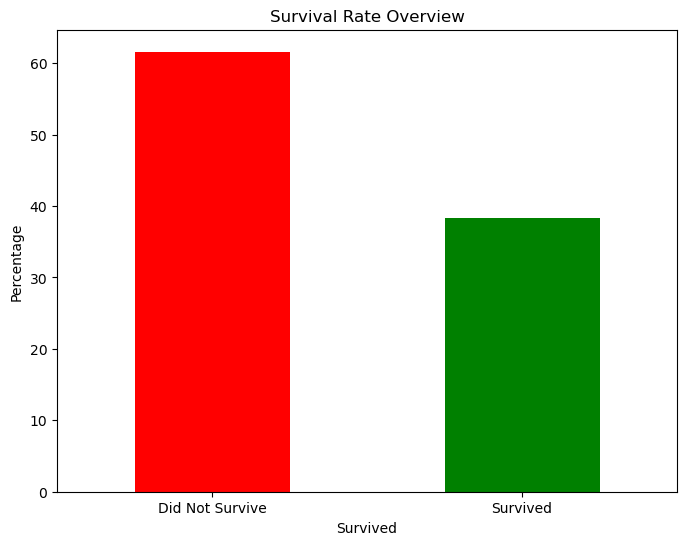

In [22]:
#Survived or not
survival_rate = df['Survived'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
survival_rate.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Rate Overview')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks(ticks=[0,1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()



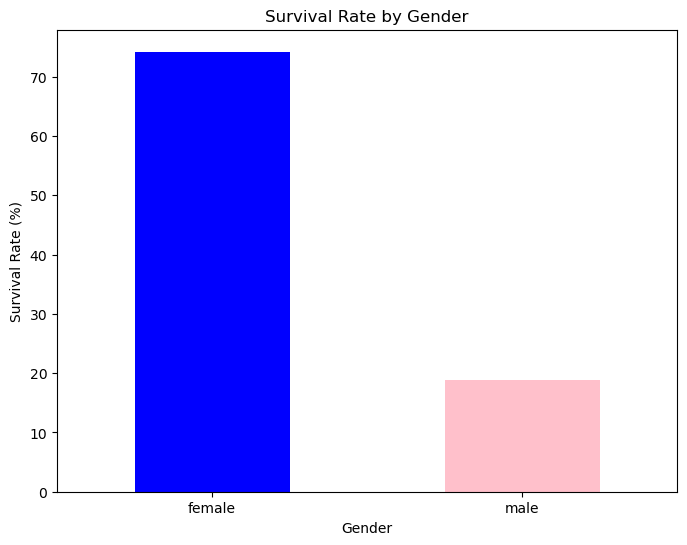

In [23]:
#survive by gender
survived_by_gender = df.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(8,6))
survived_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()


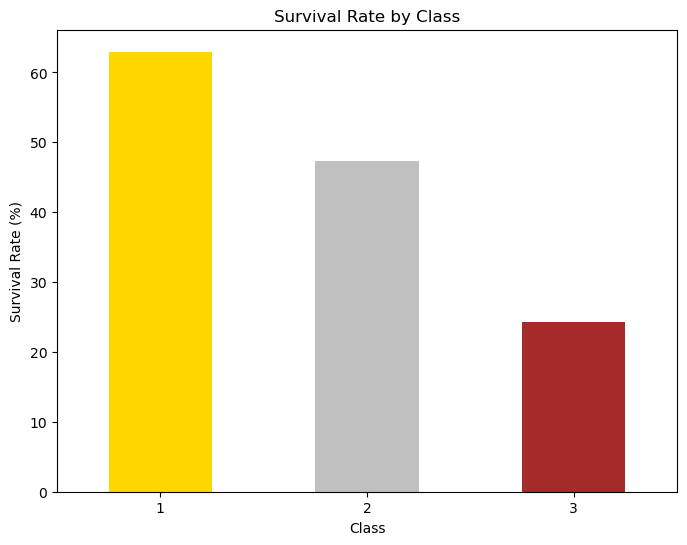

In [26]:
#Class
survived_by_class = df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8,6))
survived_by_class.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()



In [27]:
# Drop rows with missing 'Age' values
df = df.dropna(subset=['Age'])

In [28]:
#Age groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

/var/folders/2v/47jh88kj43709rc60k056wj00000gn/T/ipykernel_46058/3851690125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100


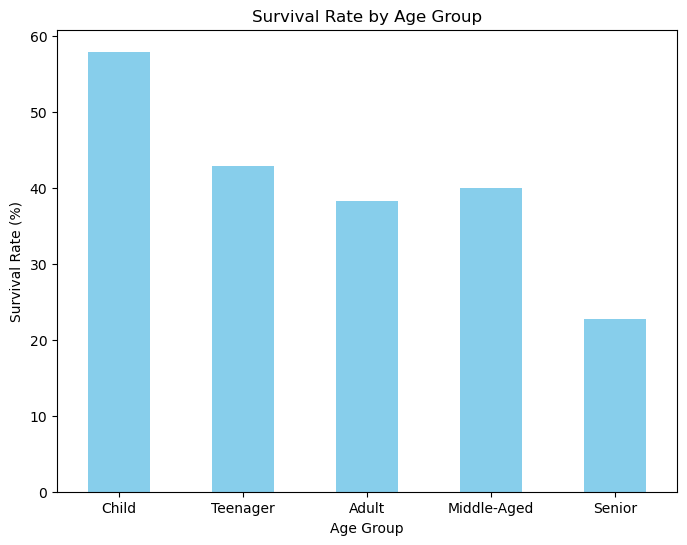

In [29]:
#survive by age groups
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100

# Plot survival rate by age group
plt.figure(figsize=(8,6))
survival_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()

In [31]:
# Drop rows with missing 'Fare' values
df = df.dropna(subset=['Fare'])

In [32]:
#fare groups
bins = [0, 7.91, 14.454, 31, 512]
labels = ['Low', 'Medium', 'High', 'Very High']
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels)

/var/folders/2v/47jh88kj43709rc60k056wj00000gn/T/ipykernel_46058/4032277054.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100


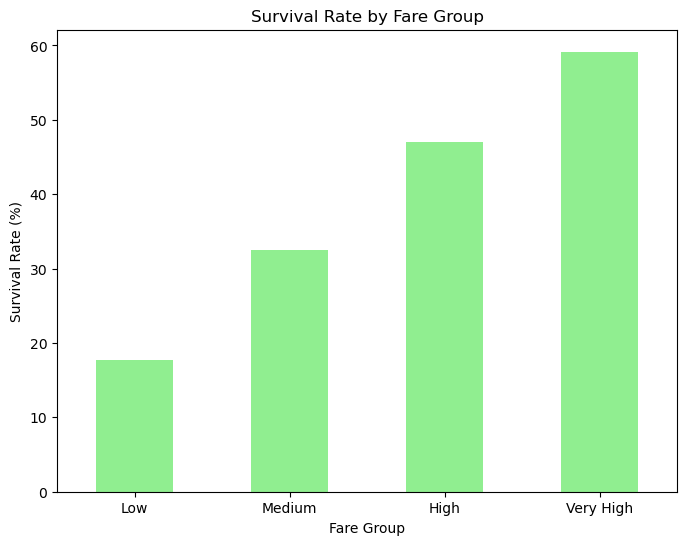

In [33]:
#survive by fare group
survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100

# Plot survival rate by fare group
plt.figure(figsize=(8,6))
survival_by_fare_group.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()


In [34]:
# Create fare ranges
bins = [0, 7.91, 14.454, 31, 512]
df['FareRange'] = pd.cut(df['Fare'], bins=bins)

/var/folders/2v/47jh88kj43709rc60k056wj00000gn/T/ipykernel_46058/3358006607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_range = df.groupby('FareRange')['Survived'].mean() * 100


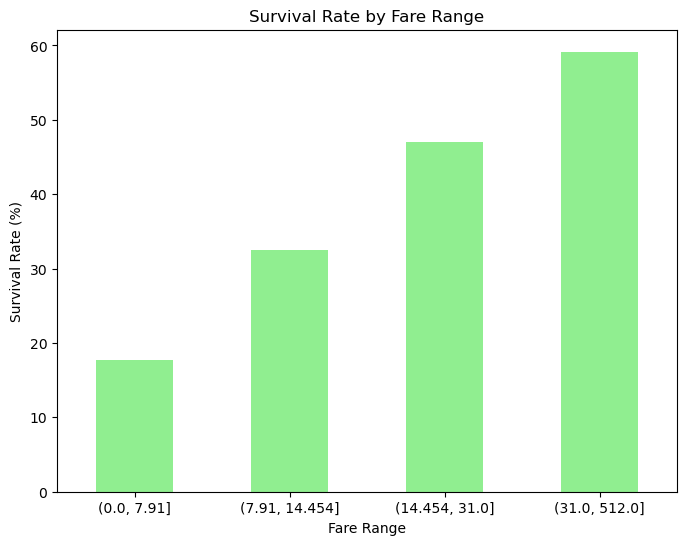

In [35]:
#survival rate by fare range
survival_by_fare_range = df.groupby('FareRange')['Survived'].mean() * 100

# Plot survival rate by fare range
plt.figure(figsize=(8,6))
survival_by_fare_range.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()

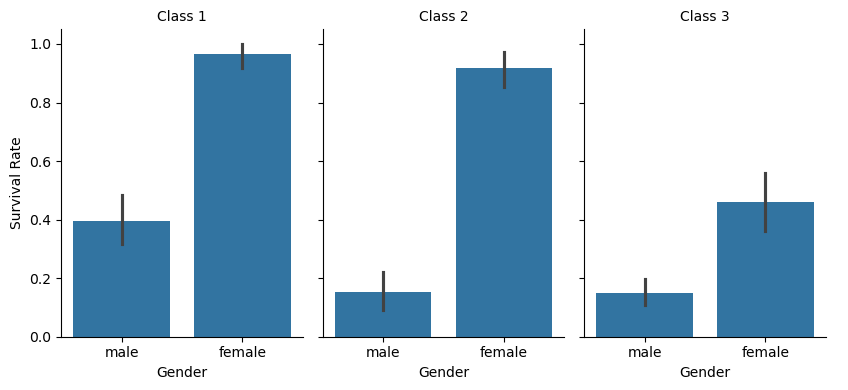

In [36]:
#facet grid
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=df, kind="bar", height=4, aspect=0.7)
g.set_axis_labels("Gender", "Survival Rate")
g.set_titles("Class {col_name}")
plt.show()


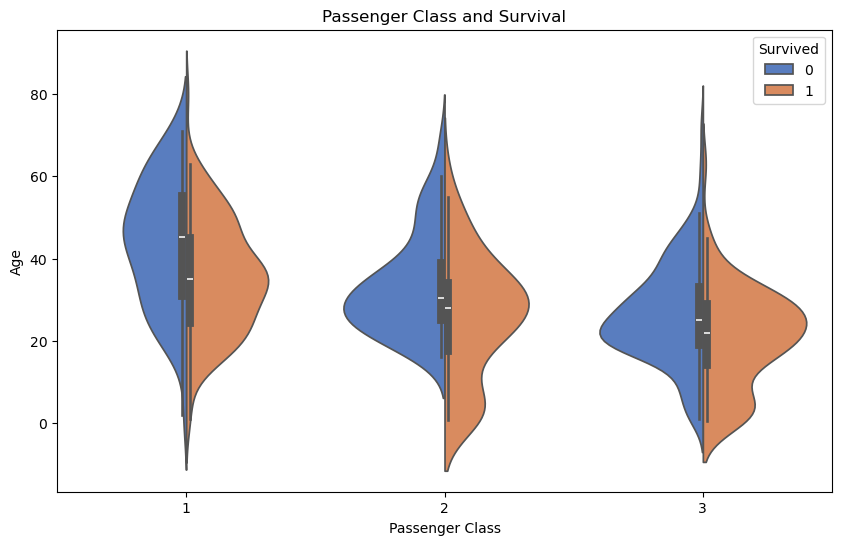

In [40]:
#violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='muted')


plt.title('Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


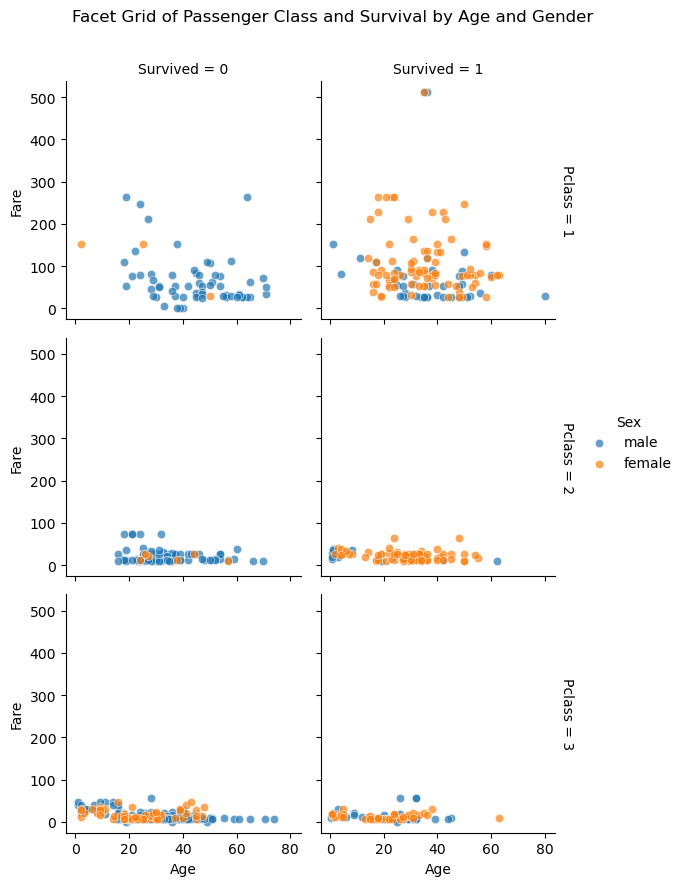

In [42]:
#facetGrid with age
g = sns.FacetGrid(df, col="Survived", row="Pclass", hue="Sex", margin_titles=True)
g.map(sns.scatterplot, "Age", "Fare", alpha=.7)
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid of Passenger Class and Survival by Age and Gender')
plt.show()


In [45]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
heatmap_data

Sex,female,male
Pclass,,
1,0.964706,0.396040
2,0.918919,0.151515
3,0.460784,0.150198


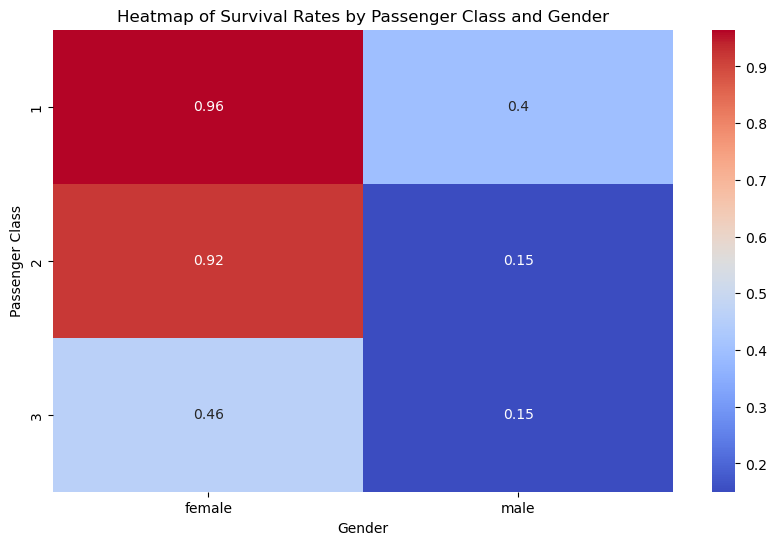

In [46]:
#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)

plt.title('Heatmap of Survival Rates by Passenger Class and Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Class')
plt.show()

# Misleading

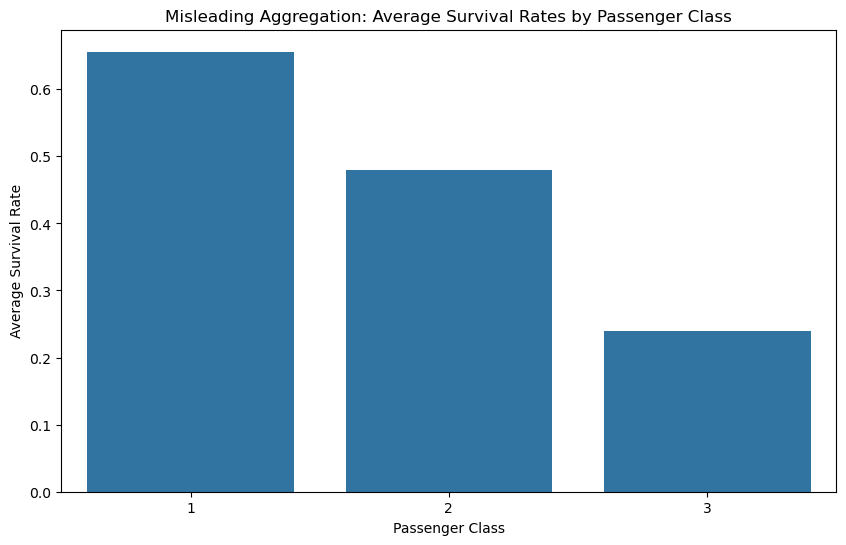

In [47]:
# Create a misleading aggregation by showing average survival rates without breaking down by class or gender
misleading_data = df.groupby('Pclass')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=misleading_data)
plt.title('Misleading Aggregation: Average Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Survival Rate')
plt.show()

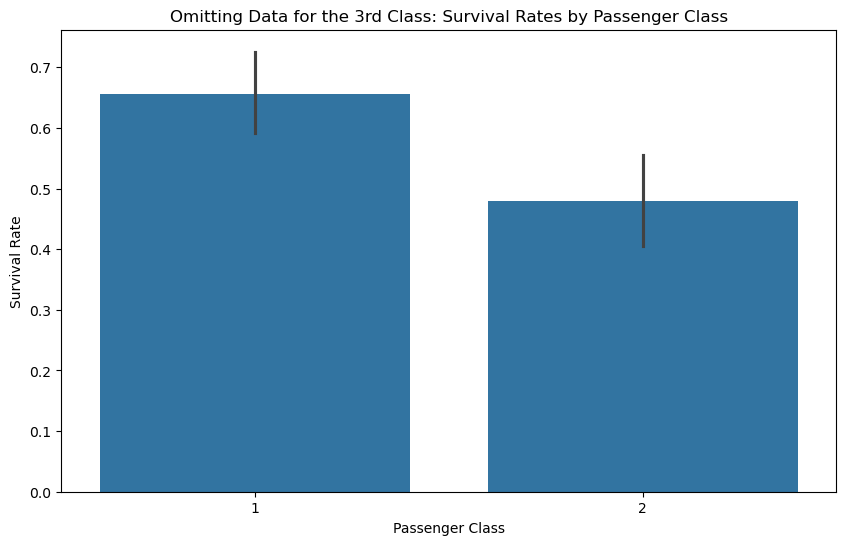

In [48]:
# Omit data for the 3rd class
filtered_data = df[df['Pclass'] != 3]

#bar
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=filtered_data)
plt.title('Omitting Data for the 3rd Class: Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

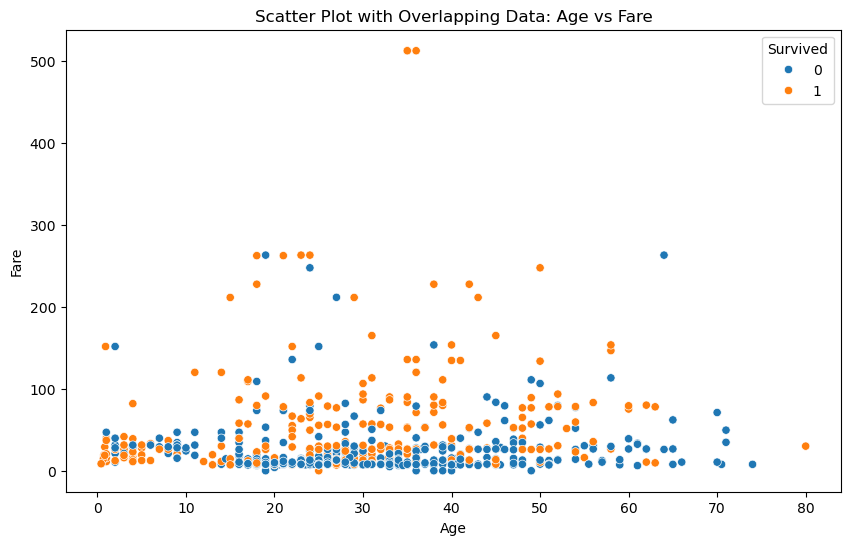

In [50]:
#Create a scatter plot with overlapping data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot with Overlapping Data: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()